In [0]:
import numpy as np
import pandas as pd
#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [86]:
original_df = pd.read_csv('AAPL.csv')
original_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-09-01,164.800003,164.940002,163.630005,164.050003,159.137039,16591100
1,2017-09-05,163.750000,164.250000,160.559998,162.080002,157.226044,29468500
2,2017-09-06,162.710007,162.990005,160.520004,161.910004,157.061127,21651700
3,2017-09-07,162.089996,162.240005,160.360001,161.259995,156.430603,21928500
4,2017-09-08,160.860001,161.149994,158.529999,158.630005,153.879349,28611500


In [87]:
print('The shape of dataframe is {}'.format(original_df.shape))
original_df.dtypes

The shape of dataframe is (502, 7)


Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [88]:
df = original_df[{'Date','Close'}]
df.shape

(502, 2)

In [89]:
df['Date'] = pd.to_datetime(df.Date, format = '%Y-%m-%d')
print('The datatypes of the new dataframe are {}'.format(df.dtypes))
df['Day'] = pd.DatetimeIndex(df['Date']).day
df['Week'] = pd.DatetimeIndex(df['Date']).week
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Year'] = pd.DatetimeIndex(df['Date']).year

df.index = df['Date']
df.drop(['Date'], axis=1, inplace= True)
df.head()

The datatypes of the new dataframe are Date     datetime64[ns]
Close           float64
dtype: object


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

,Close,Day,Week,Month,Year
Date,,,,,
2017-09-01,164.050003,1,35,9,2017
2017-09-05,162.080002,5,36,9,2017
2017-09-06,161.910004,6,36,9,2017
2017-09-07,161.259995,7,36,9,2017
2017-09-08,158.630005,8,36,9,2017


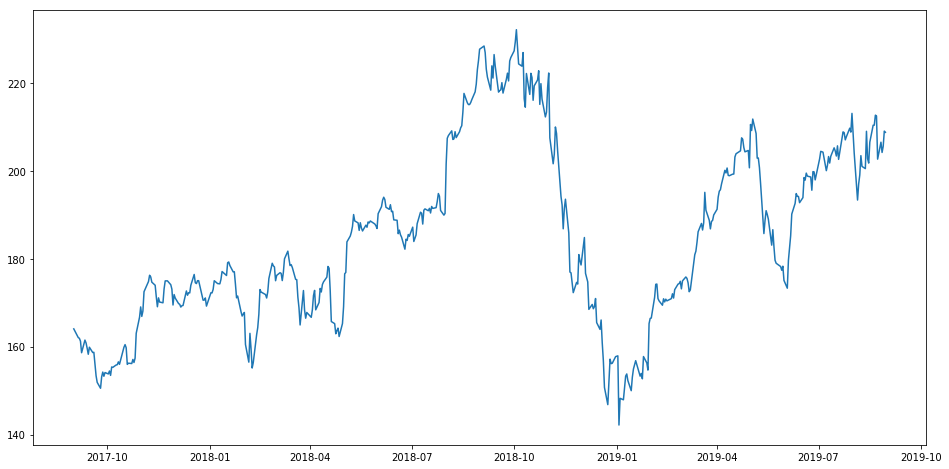

In [90]:
#plotting the graph for observing the close price over different time intervals 
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [0]:
def split_train_test_df(df):
  df_size = len(df)
  split_num =int(df_size *0.85)
  train_data = df.iloc[0:split_num]
  test_data = df.iloc[split_num: df_size]
  
  return train_data, test_data

In [92]:
train_data, test_data = split_train_test_df(df)
print('The size of training data is {} and the size of testing data is {}'.format(train_data.size, test_data.size))

train_data.head()

The size of training data is 2130 and the size of testing data is 380


,Close,Day,Week,Month,Year
Date,,,,,
2017-09-01,164.050003,1,35,9,2017
2017-09-05,162.080002,5,36,9,2017
2017-09-06,161.910004,6,36,9,2017
2017-09-07,161.259995,7,36,9,2017
2017-09-08,158.630005,8,36,9,2017


In [0]:
x_train = train_data.drop('Close', axis=1)
y_train = train_data['Close']
x_valid = test_data.drop('Close', axis=1)
y_valid = test_data['Close']

In [0]:
def plot_predictions(y_valid, preds, title_label):
  """This function takes the input for validation dataset, predicted output
     and title label to be plotted and plot the graph to visualise the 
     difference between the actual value and predicted values
   """
  plt.figure(figsize=(16,8))
  plt.plot(y_valid.index.values, y_valid, label='Actual closing unit')
  plt.plot(y_valid.index.values, preds, label='Predicted closing unit')
  plt.title(title_label)
  plt.legend()

In [0]:
def fit_predict_model(model, x_train = x_train, x_valid = x_valid, y_train = y_train, y_valid= y_valid):
  """ This function takes the input for model, x training , x validation,
      y training and y validation data and fit the model with its dataset
      it predict the ouptput and print the root mean square error
  """
  model.fit(x_train,y_train)
  model_preds = model.predict(x_valid)
  print('The root mean squared error is {}'.format(mean_squared_error(y_valid, model_preds)))
  return model_preds

In [96]:
#implementing linear regression model
lr_model = LinearRegression()
lin_preds = fit_predict_model(lr_model)

The root mean squared error is 82.50453242430729


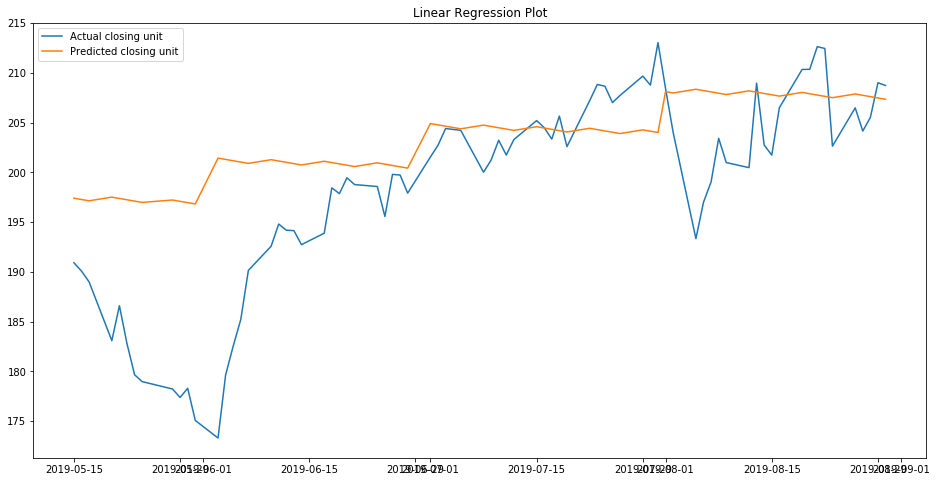

In [97]:
# plotting for linear regression model
plot_predictions(y_valid, lin_preds, 'Linear Regression Plot')

In [98]:
ridge_model = Ridge(alpha = 0.01)
ridge_preds = fit_predict_model(ridge_model)

The root mean squared error is 82.48529051295702


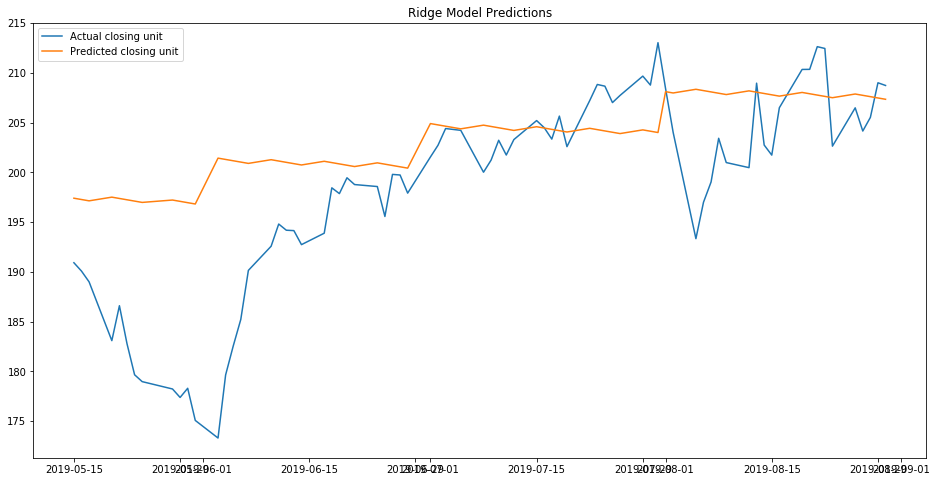

In [99]:
plot_predictions(y_valid, ridge_preds, 'Ridge Model Predictions')

In [100]:
#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
knn_model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
knn_preds = fit_predict_model(knn_model)

The root mean squared error is 90.34041832004742


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


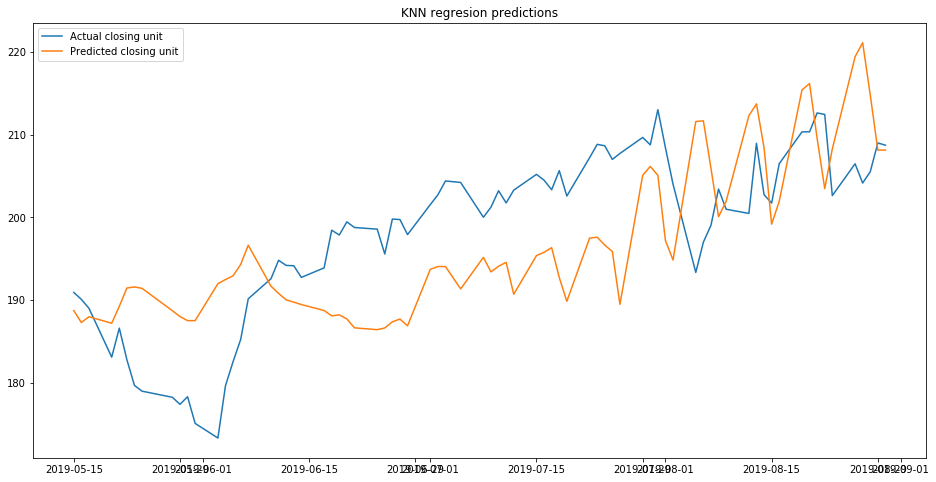

In [101]:
plot_predictions(y_valid, knn_preds, 'KNN regresion predictions')

In [102]:
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
svr_model = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5)
svr_pred = fit_predict_model(svr_model)

The root mean squared error is 416.23887726679595


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


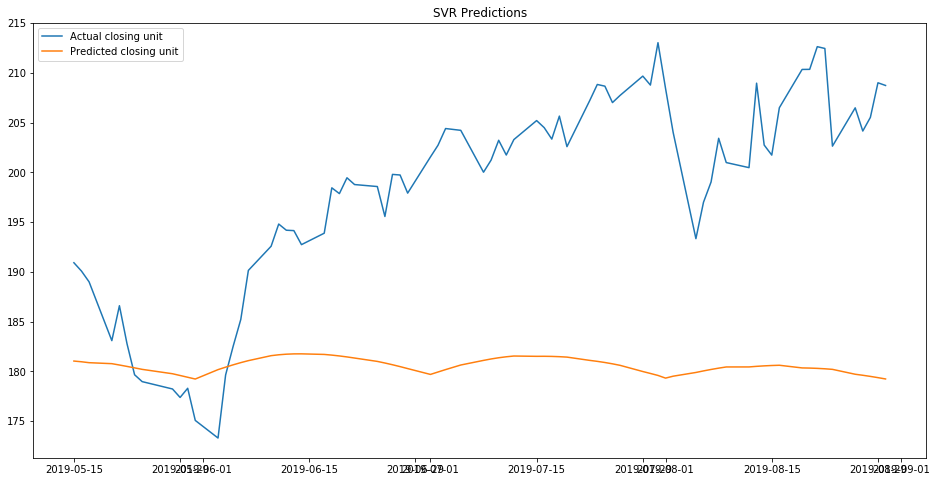

In [103]:
plot_predictions(y_valid, svr_pred, 'SVR Predictions')

In [104]:
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [106]:
  df.head()
  len(df)

502

In [126]:
#creating dataframe
data = original_df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(original_df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]
    
    
#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:426,:]
valid = dataset[426:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

Epoch 1/1
 - 23s - loss: 0.0092


In [127]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

5.737787747477608

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


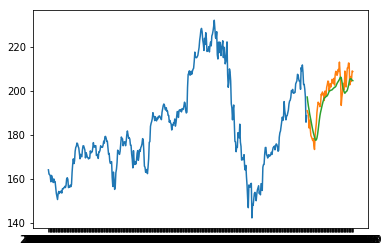

In [128]:
#for plotting
train = new_data[:426]
valid = new_data[426:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

**The conclusion can be made that LSTM worked best in the stock prediction scenario**